# Assignment 2
**Due date** December 6th, 2024.

Please fo not forget to add your names, student IDs, and emails in this file.<br>
**Only submit one file per team**

<a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Assigments/assigment_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# load the required libraries that you will need for this assignment
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
#  [5 marks]
# loading any libraries in other cells will deduct you marks.

## (Q1) Linear Regression
* For **Q1** you are only allowed to ude Numpy, Pandas, and Matplotlib, if you use any other libraries you will not get full marks.<br>
<br>

To Do: Write an introduction to the linear regression. <br>

The following data is based on a Polynomial expansion to predict the electronic energy of methane for different geometries. <br>
We will follow the work presented in the paper, [paper link](https://pubs.acs.org/doi/full/10.1021/acs.jctc.9b00043)<br>
"*Using Gradients in Permutationally Invariant Polynomial Potential Fitting: A Demonstration for CH4 Using as Few as 100 Configurations*".

The main idea is to expand the inter-atomic distance of the 5 atoms in terms on a polynomial expansion,
$$
y = \sum^{np}_{i} w_i \phi_i(\mathbf{r})
$$
where $w_i$ are the weights, $\phi_i$ are the Permutationally Invariant Polynomial expansion, and $\mathbf{r}$ are the inter-atomic distances.

In the dataset provided, the values of the vector $\mathbf{\phi}(\mathbf{r})^\top = [\phi_0(\mathbf{r}),\cdots,\phi_{np}(\mathbf{r})]$, are in each column of a raw, with the respective energy in the last column.


## (Q1.A) Data preprocessing
1. Load the dataset from the provided link and print the first few rows.<br>
    (https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv)<br>
    1. Answer the following questions,
       1. How many points does the dataset contains?
       2. What is the point with the lowest energy and what is its value?
       3. What is the range of energies in the dataset?
       4. Do a histogram of the energy.
   

## (Q1.B) Data splitting fitting
Before you carry each of these three different strategies to find the optimal mode, you first need to,
   1. Sample **100** random points (training points), and other **500** random points (test points). <br>
   Use the randomly sampled 100 points only for training, and the other 500 to test accuracy of the three different models. <br>

## (Q1.C) Model fitting,
The main goal of this section is to train this regression model using,
   1. Exact solution
   2. Gradient descent
      1. Do not forget to play around with the $\eta$ parameter for gradient descent,
      2. How many iterations do you need to reach a "good" model.
      3. Plot the value of the training error as a function of the iterations in gradient descent, (this is known as **learning curves**).
   3. SVD for linear regression

**Extra results you need to include,**
1. In a single figure, plot the vector of the optimal linear weights of the three models, label each curve.
2. For each model, create a figure where you plot **predicted vs true** values of the training and test points (use different symbols to identify training and test points). <br>
In each figure, also display the [$r^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination) value.
3. What of the three models had the best performance?
4. Choose the model with the lowest test error, you can use root mean squared error, and see how much the test error will change if we sample another *100* points from the untouched data as the new training points.
Do this 5 times so we can compute the mean and standard deviation of the test error.


   Unnamed: 0  phi_0     phi_1     phi_2     phi_3     phi_4     phi_5  \
0           0    1.0  0.206794  0.047658  0.016033  0.004927  0.000189   
1           1    1.0  0.204853  0.047194  0.015728  0.004834  0.000186   
2           2    1.0  0.202104  0.046530  0.015310  0.004705  0.000180   
3           3    1.0  0.199966  0.046054  0.014993  0.004608  0.000176   
4           4    1.0  0.199642  0.046051  0.014946  0.004597  0.000175   

      phi_6     phi_7     phi_8  ...    phi_21    phi_22    phi_23    phi_24  \
0  0.004928  0.000757  0.010698  ...  0.001659  0.000255  0.000255  0.000039   
1  0.004834  0.000740  0.010509  ...  0.001613  0.000248  0.000248  0.000038   
2  0.004699  0.000718  0.010226  ...  0.001549  0.000238  0.000238  0.000037   
3  0.004601  0.000703  0.010000  ...  0.001499  0.000231  0.000230  0.000036   
4  0.004596  0.000703  0.009966  ...  0.001492  0.000229  0.000229  0.000036   

     phi_25    phi_26    phi_27    phi_28    phi_29     energy  
0  0.0000

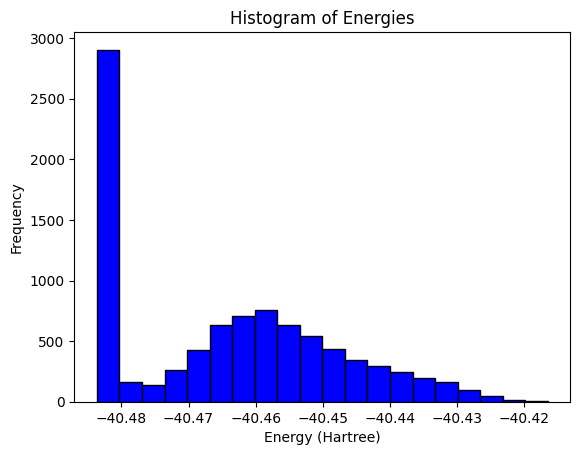

In [ ]:
# Q1.A. Data preprocessing

# load data using pandas
dataset = "https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv"
df = pd.read_csv(dataset)
print(df.head())

# 1. How many points does the dataset contains?
num_points = df.shape[0]
print(f"The number of points = {num_points}")

# 2. What is the point with the lowest energy and what is its value?
min_energy = df.iloc[:, -1].min()
min_energy_index = df.iloc[:, -1].idxmin()

lowest_energy_point = df.iloc[min_energy_index]

min_energy = df.iloc[:, -1].min()
min_energy_index = df.iloc[:, -1].idxmin()
lowest_energy_point = df.iloc[min_energy_index]

print(f"The point with the lowest energy has an energy of {min_energy} Hartree.")
print(f"The data point is:\n{lowest_energy_point}")

# 3. What is the range of energies in the dataset? The energy is reported in Hartree
energy_column = df.iloc[:, -1]
min_energy = energy_column.min()
max_energy = energy_column.max()
energy_range = max_energy - min_energy

print(f"The range of energies in the dataset is: {min_energy} -> {max_energy} Hartree")

# 4. Do a histogram of the energy.
plt.hist(energy_column, bins=20, color='blue', edgecolor='black')
plt.xlabel("Energy (Hartree)")
plt.ylabel("Frequency")
plt.title("Histogram of Energies")
plt.show()


In [ ]:
# Q1.B Data splitting for training and testing.


trainingpoints = df.sample(n=100, random_state=1)
print(trainingpoints.size)
X_train = trainingpoints.iloc[:, :-1]
print(X_train)
print(X_train.size)
y_train = trainingpoints.iloc[:, -1]
X_train = X_train.to_numpy()
print(X_train)
y_train = y_train.to_numpy()

testingpoints = df.sample(n=500, random_state=2)
X_test = testingpoints.iloc[:, :-1]
y_test = testingpoints.iloc[:, -1]
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# code here,

3200
      Unnamed: 0  phi_0     phi_1     phi_2     phi_3     phi_4     phi_5  \
5221        5221    1.0  0.222953  0.056816  0.018437  0.006205  0.000260   
2975        2975    1.0  0.200118  0.045686  0.015012  0.004567  0.000173   
5786        5786    1.0  0.184001  0.041450  0.012582  0.003725  0.000136   
8591        8591    1.0  0.157519  0.035586  0.009283  0.002785  0.000121   
1321        1321    1.0  0.199633  0.045775  0.014944  0.004571  0.000175   
...          ...    ...       ...       ...       ...       ...       ...   
7053        7053    1.0  0.188242  0.042949  0.013210  0.004006  0.000152   
4437        4437    1.0  0.236232  0.063177  0.020918  0.007431  0.000315   
7540        7540    1.0  0.159934  0.035339  0.009417  0.002706  0.000100   
8791        8791    1.0  0.185338  0.039921  0.012812  0.003697  0.000133   
4945        4945    1.0  0.170187  0.036408  0.010850  0.003078  0.000105   

         phi_6     phi_7     phi_8  ...        phi_20    phi_21    phi

In [ ]:

# Q1.C Exact solution of Linear Regression
w_exact = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)
print(w_exact)

[ 7.73651932e-09 -3.95527234e+01 -1.65594390e+01  2.10849986e+01
  1.22600893e+02 -5.81302813e+01  3.65442400e+02  1.70292536e+00
 -9.15776566e+02  1.19342861e+02 -3.27363994e+02 -6.59221955e+02
 -2.40238377e+03 -1.79008067e+03  5.49783120e+03 -5.50243645e+02
  1.62662316e+04  1.22325882e+04 -2.52204946e+04 -6.30246782e+04
  2.38514086e+04 -1.05347228e+05 -8.62993512e+01 -1.41442412e+03
 -3.72767614e+03  3.44773065e+03 -1.50075322e+04  3.72283491e+03
 -2.40716762e+04  2.82577795e+02  7.52537781e+03]


In [ ]:

n= 0.01
iterations = 10
w = np.ones(X_train.shape[1])

def gradient(X_train, y_train, w, n):
    N = X_train.shape[0]
    # Convert X_train and y_train to NumPy arrays to ensure consistent data types

    dldw = -2 * X_train.T @ (y_train - X_train @ w)

    w = w + n * dldw / N

    return w

print(gradient(X_train, y_train, w, n))



[5.17112937e+05 9.06067598e+01 1.83968576e+01 5.16924097e+00
 2.27425964e+00 1.40895817e+00 1.01737733e+00 1.41658096e+00
 1.06392095e+00 1.87165160e+00 1.03806142e+00 1.04174025e+00
 1.01009450e+00 1.04110683e+00 1.00350726e+00 1.01045720e+00
 1.00316917e+00 1.00645126e+00 1.00052467e+00 1.00016284e+00
 1.00328764e+00 1.00016321e+00 1.12841552e+00 1.02068773e+00
 1.02144509e+00 1.00377163e+00 1.00034262e+00 1.00389295e+00
 1.00114839e+00 1.04497311e+00 1.00040346e+00]


In [ ]:
# Q1.C SVD for Linear Regression

# code here

# (Q2) Newton's method for Nonlinear set of equations

* For **Q2** you are only allowed to ude Numpy, Pandas, and Matplotlib, if you use any other libraries you will not get full marks.<br>
<br>

Let's consider the following reactions,
$$
ScF_3(s) \to Sc^{3+}(aq) + 3F^{-}(aq), \;\; K_{sp} = 4.2\times10^{-18}\\
HF(aq) + H_2O \to H_3O^{+}(aq) + F^{-}(aq), \;\; K_{a} = 5.6\times10^-4\\
2H_2O \to H_3O^{+} + OH^{-}(aq), \;\; K_w = 10^{-14}
$$


We can write the concentration values for each species at equilibrium using three main variables, $\mathbf{x}^\top = [x_{sp},x_{a},x_{w}]$.
These give us the following relations,
$$
K_{sp} = x_{sp}(3x_{sp}+ x_a)^3 \\
K_{a} = \frac{(x_{a}+x_w)(3x_{sp} + x_a)}{-x_a} \\
K_w = (x_a+x_w)(x_w)
$$

You can use the following initial values for each species,
1. $x_{sp} = 2\times^{-5}$
2. $x_a = -6.2\times^{-4}$
3. $x_w = 6.2\times^{-4}$
   
```x0 = np.array([2E-5,-6.2E-4,62E-4])```. <br>

 <br>

**Results to include,**
1. Implement the Vector function to find $\mathbf{x}^\top = [x_{sp},x_{a},x_{w}]$.
2. Implement the Jacobian function.
3. Implement the Newton's method step function.
4. Figure illustrating the value of the three concentrations as a function of the iterations in Newton's method.
5. The value of the concentrations.
6. How many iterations are required for the concentration to change less than 1E-4 from the previous iteration.
7. Check if the answer of Newton's method depends on the initial value of the concentrations, you can use ```x0 = np.random.uniform(1E-5,1E-3,(3,))```, to generate some random initial guess.


In [ ]:
def equations_of_motion(x, k):
    # code here

    xsp, xa, xw = x
    Ksp, Ka, Kw = k

    f1 = x[0] * (3 * x[0] + x[1]) ** 3 - k[0]
    f2 = (x[1] + x[2]) * (3 * x[0] + x[1]) / (-x[1]) - k[1]
    f3 = (x[1] + x[2]) * x[2] - k[2]


    return np.array([f1,f2,f3])

def jacobian_of_equations_of_motion(x, k):
    # code here

    xsp, xa, xw = x

    # Partial derivatives for matrix
    J11 = -(3 * xsp + xa)**3 - 9 * xsp * (3 * xsp + xa)**2
    J12 = -3 * xsp * (3 * xsp + xa)**2
    J13 = 0
    J21 = -(xa + xw) * 3
    J22 = -(3 * xsp + xa) + 1
    J23 = -(3 * xsp + xa)
    J31 = 0
    J32 = -xw
    J33 = -(xa + xw) - 1

    # matrix
    jacobian = np.array([[J11, J12, J13],
                         [J21, J22, J23],
                         [J31, J32, J33]])
    return jacobian

def newton_step(x0,k):
    #code here

    # Compute G(x) and J(x)
    G = equations_of_motion(x0, k)
    J = jacobian_of_equations_of_motion(x0, k)

    # Compute the Newton step
    delta_x = np.linalg.solve(J, G)  # Solve J * delta_x = G
    x_next = x0 - delta_x            # Update rule

    return x_next

In [ ]:
# Newton's method

k = np.array([4.2E-18, 5.6E-4,1E-14])
x0 = np.array([2E-5,-6.2E-4,62E-4])

# code here for the iteration of Newton's method

def newton_method(x0, k, tol=1E-4, max_iter=100):

    x = x0
    history = [x]

    for i in range(max_iter):
        x_next = newton_step(x, k)
        history.append(x_next)

        # Check convergence
        if np.linalg.norm(x_next - x) < tol:
            break

        x = x_next

    return x_next, np.array(history), i + 1

# Constants
Ksp = 4.2E-18
Ka = 5.6E-4
Kw = 1E-14
k = (Ksp, Ka, Kw)

# Initial guess
x0 = np.array([2E-5, -6.2E-4, 6.2E-4])

# Run Newton's method
solution, history, iterations = newton_method(x0, k)

# Results
print(f"Final solution: Xsp = {solution[0]} Xa = {solution[1]}  Xw = {solution[2]}")
print(f"Number of iterations: {iterations}")


In [ ]:
# Newton's method with a random initial guess
k = np.array([4.2E-18, 5.6E-4, 1E-14])
xrand = np.random.uniform(1E-3, 1E-3, (3,))

# code here for the iteration of Newton's method

def newton_method(xrand, k, tol=1E-4, max_iter=100):

    x = xrand
    history = [x]

    for i in range(max_iter):
        x_next = newton_step(x, k) * 0.3  #DAMPENING FACTOR APPLIED
        history.append(x_next)

        # Check convergence
        if np.linalg.norm(x_next - x) < tol:
            break

        x = x_next

    return x_next, np.array(history), i + 1

    # Constants
Ksp = 4.2E-18
Ka = 5.6E-4
Kw = 1E-14
k = (Ksp, Ka, Kw)

# Initial guess
xrand = np.random.uniform(1E-3, 1E-3, (3,))

# Run Newton's method
solution_rand, history_rand, iterations_rand = newton_method(xrand, k)

# Results
print(f"Final solution: Xsp = {solution_rand[0]} Xa = {solution_rand[1]}  Xw = {solution_rand[2]}")
print(f"Number of iterations: {iterations_rand}")

# Plot the convergence of each variable for random start
iterations_range_rand = np.arange(len(history_rand))
xsp_vals_rand, xa_vals_rand, xw_vals_rand = history_rand.T

plt.figure(figsize=(8, 6))
plt.plot(iterations_range_rand, xsp_vals_rand, label="$x_{sp}$ (random)")
plt.plot(iterations_range_rand, xa_vals_rand, label="$x_{a}$ (random)")
plt.plot(iterations_range_rand, xw_vals_rand, label="$x_{w}$ (random)")
plt.xlabel("Iterations")
plt.ylabel("Concentration (mol/L)")
plt.title("Concentrations as a Function of Iterations (Random Start)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Q2 Results
# 4. Figure illustrating the value of the three concentrations as a function of the iterations in Newton's method.

# Plot the convergence of each variable

iterations_range = np.arange(len(history))
xsp_vals, xa_vals, xw_vals = history.T

plt.figure(figsize=(8, 6))
plt.plot(iterations_range, xsp_vals, label="$x_{sp}$")
plt.plot(iterations_range, xa_vals, label="$x_{a}$")
plt.plot(iterations_range, xw_vals, label="$x_{w}$")
plt.xlabel("Iterations")
plt.ylabel("Concentration (mol/L)")
plt.title("Concentrations as a Function of Iterations")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 5. The value of the concentrations.
print(f"Final solution: Xsp = {solution[0]} Xa = {solution[1]}  Xw = {solution[2]}")
# 6. How many iterations are required for the concentration to change less than 1E-4 from the previous iteration.

print(f"Number of iterations: {iterations}")

# 7. Check if the answer of Newton's method depends on the initial value of the concentrations, you can use ```x0 = np.random.uniform(1E-5,1E-3,(3,))```, to generate some random initial guess.

print(f"Final solution for random start: Xsp = {solution_rand[0]} Xa = {solution_rand[1]}  Xw = {solution_rand[2]}")
print(f"Number of iterations for random start: {iterations_rand}")

# Q3 Molecular orbitals and Diagonalization

# Hückel model
As we saw in class, the Hückel model is one of the most basic models to describe the interaction between electrons in a molecule. <br>
The Hückel model is based on the following assumptions:
1. Only next-nearest neighbors atoms form bonds and if so $S_{ij} = 1$, else $S_{ij} = 0$.
2. The matrix elements of the Hamiltonian are described depending on the type of atom. <br>
   We will follow the notation of the paper, [A Pariser-Parr-Pople-based set of Hueckel molecular orbital parameters](https://pubs.acs.org/doi/abs/10.1021/jo01311a060), <br>
   where the diagonal elements ($h_i$) and off-diagonal elements ($h_{ij}$) are given by,

    $$
    h_{i} = \alpha_0 + h_{X} \beta_0 \\
    h_{ij} = h_{X,Y} \beta_0 \\
    $$
    
Table 1 and 2 from [paper](https://pubs.acs.org/doi/abs/10.1021/jo01311a060) have those respected values.
1. Table 1 $\to$ $h_i$ for different types of atoms.
2. Table 2 $\to$ $ h_{X,Y}$ for different types of atoms, $X$ and $Y$ are the index for the type of atoms that form a bond.

**Results to include,**
1. What is the **HOMO-LUMO** value for Benzene.
2. Plot HOMO or LUMO orbital using the ```plot_benzene_with_lcao_circles()``` function.
   

In [ ]:
def create_hamiltonian_for_benzene():
  H = np.zeros((6,6))
  for i in range(6):
    for ii in range(6):
      if i-ii == 1 or i-ii == 5 or ii-i == 1 or ii-i == 5:
        H[i,ii] = 1
  return H

def diagonalize_hamiltonian():
    eigenvalues, eigenvectors = np.linalg.eig(create_hamiltonian_for_benzene())
    return eigenvalues, eigenvectors

def generate_lcao_magnitudes(eigenvalues,eigenvectors):
  #benzene has 3 double bonds so 6 pi electrons
  #therefore the 3rd eigenvalue is the HOMO eigenvector
  eigenvalues_sorted = np.sort(eigenvalues)
  HOMO_eigenvalue = eigenvalues_sorted[2]
  for i in range(eigenvalues.size):
    if eigenvalues[i] == HOMO_eigenvalue:
      HOMOindex = i
  HOMO = eigenvectors[HOMOindex]
  print("HOMOindex: ", HOMOindex)
  print("HOMO eigenvalue: ", eigenvalues[HOMOindex], " HOMO eigenvector: ", eigenvectors[HOMOindex])
  return HOMO

def calc_HOMO_LUMO_gap(eigenvalues):
  eigenvalues_sorted = np.sort(eigenvalues)
  HOMO_eigenvalue = eigenvalues_sorted[2]
  LUMO_eigenvalue = eigenvalues_sorted[3]
  HOMO_LUMO_gap = LUMO_eigenvalue - HOMO_eigenvalue
  return HOMO_LUMO_gap


In [ ]:

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Define the benzene molecule coordinates
def benzene_positions():
    # 6 evenly spaced points around a circle
    theta = np.linspace(0, 2 * np.pi, 7)[:-1]
    radius = 1.0
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.array([x, y]).T

# Plot benzene with LCAO magnitudes
def plot_benzene_with_lcao_circles(magnitudes):
    positions = benzene_positions()
    # magnitudes = generate_lcao_magnitudes()

    # Normalize magnitudes for color mapping
    norm = Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
    colormap = plt.cm.viridis

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    # Plot benzene structure
    for i in range(len(positions)):
        ax.plot(
            [positions[i, 0], positions[(i + 1) % len(positions), 0]],
            [positions[i, 1], positions[(i + 1) % len(positions), 1]],
            'k-', lw=2
        )

    # Plot circles for each carbon atom
    for pos, mag in zip(positions, magnitudes):
        color = colormap(norm(mag))
        circle = plt.Circle(pos, radius=0.2, color=color,
                            edgecolor='black', lw=1)
        ax.add_artist(circle)
        ax.text(pos[0], pos[1], f"{mag:.2f}", fontsize=8,
                ha='center', va='center', color='white')

    # Add colorbar
    sm = ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array(magnitudes)
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label("Magnitude of LCAO")

    # Adjust plot limits and labels
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    plt.title("Benzene with LCAO Magnitudes (Circles by Magnitude)")
    plt.show()


Hamiltonian matrix: 
[[0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0.]]
# of eigenvalues:  6
HOMOindex:  4
HOMO eigenvalue:  -0.9999999999999996  HOMO eigenvector:  [ 0.40824829 -0.40824829  0.28867513 -0.29351503 -0.5297411   0.4437968 ]
[0.40824829 0.40824829 0.28867513 0.29351503 0.5297411  0.4437968 ]


<ipython-input-13-3fd772fc7ff5>:36: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle(pos, radius=0.2, color=color,


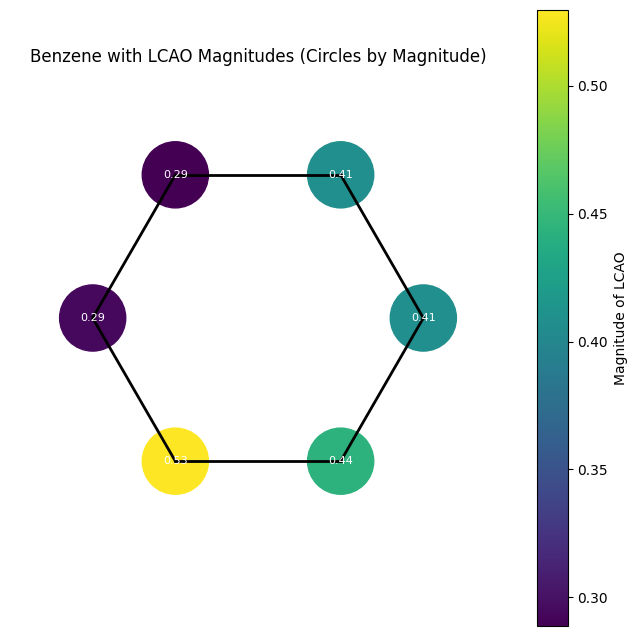

Benzene eigenvalues:  [-2. -1. -1.  1.  1.  2.]
HOMO_LUMO_gap:  1.9999999999999991


In [ ]:
#create and print Hamiltonian matrix for benzene
print("Hamiltonian matrix: ")
H = create_hamiltonian_for_benzene()
print(H)

#diagonalize hamiltonian and check the size of its eigenvalue array
eigenvalues, eigenvectors = diagonalize_hamiltonian()
print("# of eigenvalues: ", eigenvalues.size)

# Generate LCAO for HOMO and plot it
HOMO = np.abs(generate_lcao_magnitudes(eigenvalues,eigenvectors))
print(HOMO)
plot_benzene_with_lcao_circles(HOMO)

#Print LUMO-HOMO
HOMO_LUMO_gap = calc_HOMO_LUMO_gap(eigenvalues)
print("Benzene eigenvalues: ", np.sort(eigenvalues))
print("HOMO_LUMO_gap: ", HOMO_LUMO_gap)